In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('../sample_data/kosdaq_yesterday_amount_rank.xlsx')

In [3]:
from datetime import datetime
now = datetime.now()
df['hour_min'] = df['highest_time'].apply(lambda x: datetime(now.year, now.month, now.day, x.hour, x.minute))
df['month'] = df['highest_time'].apply(lambda x: x.month)

In [4]:
df

,Unnamed: 0,date,code,profit,highest_time,yesterday_rank,hour_min,month
0,0,2019-01-02,A000250,-3.29,2019-01-02 10:35:00,110,2020-01-07 10:35:00,1
1,1,2019-01-02,A000440,0.30,2019-01-02 10:06:00,379,2020-01-07 10:06:00,1
2,2,2019-01-02,A001000,0.23,2019-01-02 10:09:00,1002,2020-01-07 10:09:00,1
3,3,2019-01-02,A001540,-1.52,2019-01-02 10:42:00,762,2020-01-07 10:42:00,1
4,4,2019-01-02,A001810,-0.37,2019-01-02 10:20:00,1116,2020-01-07 10:20:00,1
...,...,...,...,...,...,...,...,...
312967,312967,2019-12-27,A336570,0.00,2019-12-27 09:26:00,1134,2020-01-07 09:26:00,12
312968,312968,2019-12-27,A337450,0.25,2019-12-27 09:04:00,1322,2020-01-07 09:04:00,12
312969,312969,2019-12-27,A339950,0.25,2019-12-27 09:03:00,1096,2020-01-07 09:03:00,12
312970,312970,2019-12-27,A340120,0.25,2019-12-27 09:03:00,1128,2020-01-07 09:03:00,12


In [5]:
rank_div_step = 10
df['yesterday_rank'].max() / rank_div_step

138.7

In [6]:
bins = pd.cut(df['yesterday_rank'], np.arange(0, df['yesterday_rank'].max(), df['yesterday_rank'].max() / rank_div_step))

In [7]:
for name, group in df.groupby(bins):
    print(name, group['profit'].mean(), group['profit'].std())

(0.0, 138.7] 0.17887402739373673 4.086806692057703
(138.7, 277.4] 0.1384400965729157 3.7121166982937175
(277.4, 416.1] 0.10525063211125159 3.7600967501911837
(416.1, 554.8] 0.07752087541072558 3.6628794038920667
(554.8, 693.5] 0.04892921632358252 3.5119320631511575
(693.5, 832.2] 0.031639838427684336 3.476987016367526
(832.2, 970.9] 0.02728094029489968 3.2968578374410744
(970.9, 1109.6] 0.0011534101080016902 2.991102329749819
(1109.6, 1248.3] -0.019247834158415834 2.745858923921017


In [8]:
df.loc[df['yesterday_rank'] < 138.7, 'profit'].mean()

0.17887402739373673

In [9]:
for name, group in df.groupby('month'):
    print(name, group['profit'].mean(), group['profit'].std())

1 0.47314519897904156 3.2289537297557485
2 0.06056147865356859 3.317686598068372
3 0.08898405268168834 3.3852578416195134
4 0.26939074484714093 2.978601260903953
5 -0.2708531039187448 3.568029654417832
6 0.15656008637156385 3.3179432665960813
7 -0.3953101490904117 3.7193634440113277
8 -0.04362513945704726 4.272441325749747
9 0.16840682671892868 3.3270482271001285
10 0.12831580882352944 3.2997967562514297
11 -0.02523262993498709 3.344186044549487
12 0.12258475250676427 3.1556711046537114


In [10]:
for i in range(10, 200, 5):
    print(i, ':', df.loc[df['yesterday_rank'] < i, 'profit'].mean())

10 : 0.34083671399594323
15 : 0.3325967036663303
20 : 0.30543890715911964
25 : 0.26206358849736733
30 : 0.253873983036178
35 : 0.27211473234036276
40 : 0.21653142709943324
45 : 0.22672488597174326
50 : 0.24982705188443471
55 : 0.2521713573209832
60 : 0.2464027040077257
65 : 0.23248620432513048
70 : 0.21991527160915614
75 : 0.21266456494325345
80 : 0.21145976002341235
85 : 0.21614636810486074
90 : 0.20888098285129256
95 : 0.20062764932562618
100 : 0.2030040047328661
105 : 0.19579367821055355
110 : 0.18703399909773205
115 : 0.18553669869270753
120 : 0.183547392563071
125 : 0.17789616008653325
130 : 0.16921573367406847
135 : 0.179409401766151
140 : 0.17751363766867645
145 : 0.17096289670912623
150 : 0.16670796672053628
155 : 0.1678456899301226
160 : 0.17153693229545838
165 : 0.17301632421018437
170 : 0.17363876952101456
175 : 0.1774384738976308
180 : 0.17688968360403318
185 : 0.1762206117601435
190 : 0.17360442665410877
195 : 0.1742238242361826


c:\users\nnnli\appdata\local\programs\python\python37-32\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


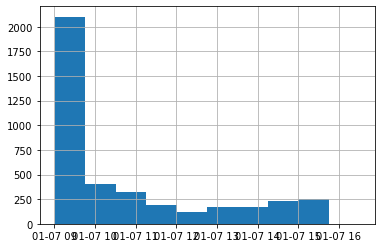

In [11]:
df.loc[df['yesterday_rank'] < 20, 'hour_min'].hist()

In [12]:
df.loc[df['yesterday_rank'] < 20, 'profit'].mean()

0.30543890715911964

In [13]:
high_rank = df[df['yesterday_rank'] < 100]
for name, group in high_rank.groupby('month'):
    print(name, group['profit'].mean(), group['profit'].std())

1 0.3880459770114943 3.174165159531939
2 0.22891420911528143 3.3920585482141847
3 0.17676136363636358 3.4649280185644944
4 0.39344202898550723 3.4642851163595
5 -0.14325517993456927 3.9289035176977753
6 -0.16664497041420118 3.90289331708066
7 -0.2074601641718976 4.045792544636167
8 -0.05178963893249615 4.908342821793178
9 0.27581260844418737 3.8789065048280573
10 0.762186680650236 5.039330056613351
11 0.16003623188405794 4.75503875119401
12 0.6319311875693674 5.718404436076588


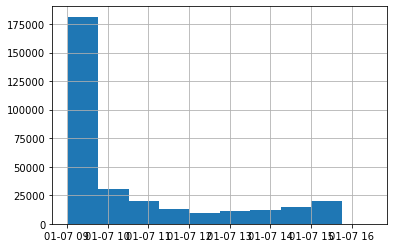

In [14]:
df['hour_min'].hist()

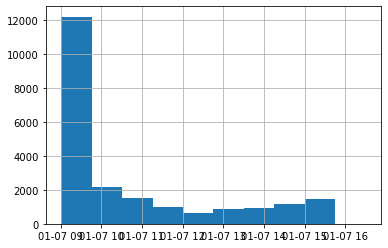

In [15]:
high_rank['hour_min'].hist()

In [16]:
profit_df = df[df['profit'] > 0]

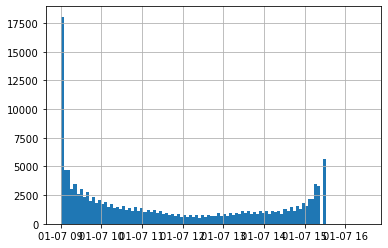

In [17]:
profit_df['hour_min'].hist(bins=100)

In [18]:
minus_profit_df = df[df['profit'] < 0]

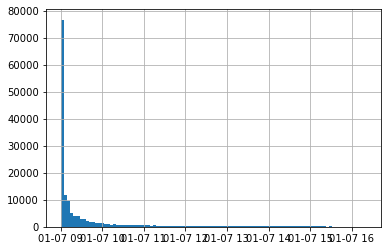

In [19]:
minus_profit_df['hour_min'].hist(bins=100)

In [20]:
df = pd.read_excel('../sample_data/chooser_experiment_KOSDAQ_20_80.xlsx')

In [21]:
df.columns

Index(['Unnamed: 0', 'date', 'code', 'today_close', 'yesterday_close',
       'profit', 'highest_time', 'highest_profit', 'lowest_time',
       'lowest_profit', 'today_amount', 'yesterday_amount',
       'yesterday_cum_buy', 'yesterday_cum_sell', 'today_cum_buy',
       'today_cum_sell', 'amount_avg', 'cum_buy_avg', 'cum_sell_avg',
       'avg_amount_rank', 'yesterday_rank', 'yesterday_moving_average',
       'top_short', 'top_long', 'bottom_short', 'bottom_long'],
      dtype='object')

In [22]:
df['month'] = df['highest_time'].apply(lambda x: x.month)
df['variable'] = df[['highest_profit', 'lowest_profit']].apply(lambda x: abs(x[0] - x[1]))
df['hour_min'] = df['highest_time'].apply(lambda x: datetime(now.year, now.month, now.day, x.hour, x.minute))

#### Question: amount can affect to profit?

In [23]:
rank_div_step = 100
bins = pd.cut(df['yesterday_rank'], np.arange(0, df['yesterday_rank'].max(), df['yesterday_rank'].max() / rank_div_step))

In [27]:
yesterday_rank_df = pd.DataFrame(columns=['group', 'mean_profit'])
i = 0
for name, group in df.groupby(bins):
    print(name, group['profit'].mean(), group['profit'].std(), 'has profit', len(group[group['profit'] > 0]), 'has loss', len(group[group['profit'] < 0]))
    yesterday_rank_df = yesterday_rank_df.append({'group': name.right, 'mean_profit': group['profit'].mean()}, ignore_index=True)
    i += 1

(0.0, 12.82] 0.38376218323586736 6.257337711726526 has profit 751 has loss 736
(12.82, 25.64] 0.2046196660482375 4.757185913570272 has profit 754 has loss 775
(25.64, 38.46] 0.1909628832705756 4.660102835481778 has profit 875 has loss 908
(38.46, 51.28] 0.2492622509423802 4.630915862887164 has profit 894 has loss 886
(51.28, 64.1] 0.0508310700706138 4.103570424990926 has profit 868 has loss 888
(64.1, 76.92] 0.17319930069930073 4.298292584999525 has profit 812 has loss 836
(76.92, 89.74] 0.10960731576116191 4.262996629780786 has profit 882 has loss 893
(89.74, 102.56] 0.08065717415115008 3.620630052745571 has profit 868 has loss 864
(102.56, 115.38] 0.05168539325842694 3.4360722723692056 has profit 847 has loss 871
(115.38, 128.2] 0.31109141274238233 4.6646887870466 has profit 856 has loss 862
(128.2, 141.02] 0.0655456852791878 4.727396057008159 has profit 734 has loss 771
(141.02, 153.84] 0.13683566433566435 3.663777887208405 has profit 835 has loss 797
(153.84, 166.66] 0.276387267904

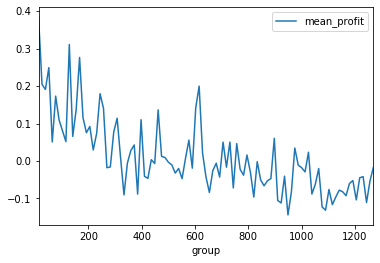

In [28]:
yesterday_rank_df.plot(x='group', y='mean_profit')

#### Answer: yesterday amount has a relationship with today profit (around group < 150 is positive)

#### Question: when yesterday amount is over amount average, have a influence to profit

In [29]:
yesterday_over_amount_df = df[df['yesterday_amount'] > df['amount_avg']]

In [30]:
yesterday_over_amount_df['profit'].mean()

0.036466184273998996

In [31]:
yesterday_under_amount_df = df[df['yesterday_amount'] < df['amount_avg']]

In [32]:
yesterday_under_amount_df['profit'].mean()

0.00154618049852569

In [33]:
amount_rank_df = df[df['yesterday_rank'] < 150]

In [34]:
amount_rank_df['profit'].mean()

0.16552524609432395

In [35]:
amount_rank_df = df[(df['yesterday_rank'] < 150) & (df['yesterday_amount'] > df['amount_avg'])]

In [36]:
amount_rank_df['profit'].mean()

0.18681135721718442

In [37]:
amount_rank_df = df[(df['yesterday_rank'] < 150) & (df['yesterday_amount'] < df['amount_avg'])]

In [38]:
amount_rank_df['profit'].mean()

0.15661237309181217

#### Anwser: no big profit, but compare to vice versa, difference is big enough

#### Question: yesterday's cum buy is greater than cum sell, have a relationship?

In [39]:
yesterday_cum_greater = df[df['yesterday_cum_buy'] > df['yesterday_cum_sell']]

In [40]:
yesterday_cum_greater['profit'].mean()

0.18033275951398056

In [41]:
yesterday_cum_greater = df[df['yesterday_cum_buy'] < df['yesterday_cum_sell']]

In [42]:
yesterday_cum_greater['profit'].mean()

-0.07188774657305248

In [54]:
amount_rank_df = df[(df['yesterday_rank'] < 150) & (df['yesterday_amount'] > df['amount_avg']) & (df['yesterday_cum_buy'] > df['yesterday_cum_sell']) & (df['yesterday_moving_average'] < df['yesterday_close'])]

In [64]:
print(amount_rank_df['profit'].mean())
print(amount_rank_df['profit'].std())

0.41798608426749134
5.261795191186212


In [65]:
print(df['profit'].mean())
print(df['profit'].std())

0.010796843786343498
3.5024283894987702


In [63]:
print(len(amount_rank_df[amount_rank_df['profit'] > 0]), len(amount_rank_df[amount_rank_df['profit'] < 0]))
has_profit_len = len(amount_rank_df[amount_rank_df['profit'] > 0])
has_loss_len = len(amount_rank_df[amount_rank_df['profit'] < 0])
print(has_profit_len / (has_profit_len + has_loss_len) * 100)
print(len(df[df['profit'] > 0]), len(df[df['profit'] < 0]))
has_profit_len = len(df[df['profit'] > 0])
has_loss_len = len(df[df['profit'] < 0])
print(has_profit_len / (has_profit_len + has_loss_len) * 100)
print(len(df[df['profit'] > 0]), len(df[df['profit'] < 0]))

1179 1298
47.59790068631409
81085 86889
48.272351673473274
81085 86889


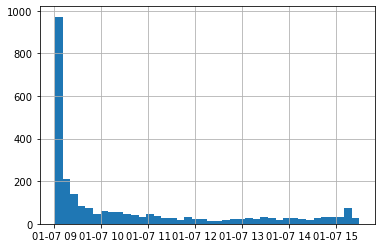

In [56]:
amount_rank_df['hour_min'].hist(bins=40)

#### Answer: yesterday cum buy / sell has a big influence to today's profit (extra: day's trend line has to improve algorithm for application), but does not mean count of stock is over half (standard deviation is big which means when will buy and sell affect to profit)